# T-distributed Stochastic Neighbor Embedding (t-SNE)

### Import thư viện cần thiết

In [107]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


## Với bộ dữ liệu Country

In [108]:
country_data = pd.read_csv('data/Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [109]:
# Chia dữ liệu thành 2 tập countries và features
countries = country_data['country']
features = country_data.drop('country', axis=1)

### Số lượng dòng và cột

In [110]:
country_data.shape

(167, 10)

Dataset có 167 dòng và 10 cột

### Thực hiện t-SNE
- Chuẩn hóa dữ liệu về cùng một thang đo để đảm bảo các đặc trưng có tầm quan trọng tương đương nhau.
- Ở đây ta sẽ xử dụng phương pháp **StandardScaler** để chuẩn hoá dữ liệu đầu vào.

In [111]:
scaler = StandardScaler()
features_scalerd = scaler.fit_transform(features)
features_scalerd.shape

(167, 9)

In [112]:

tsne = TSNE(n_components=2, random_state=0)
tsne_data= tsne.fit_transform(features_scalerd)

tsne_data = np.vstack((tsne_data.T, countries)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

In [113]:
fig, axes = plt.subplots(figsize=(20,20))
limite = 6
axes.set_xlim(-limite,limite)
axes.set_ylim(-limite+4,limite-2)
for i in range(country_data.shape[0]):
    plt.annotate(tsne_df.label[i], (tsne_df.Dim_1[i], tsne_df.Dim_2[i]))

sns.scatterplot(x="Dim_1", y="Dim_2", hue="label", data=tsne_df, palette='viridis', s=100, legend=False, ax=axes)
plt.plot([-limite,limite],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-limite,limite],color='red',linestyle='-',linewidth=1)
plt.xlabel("Facteur 1", fontsize=14,fontweight='bold')
plt.ylabel("Facteur 2", fontsize=14,fontweight='bold')
plt.show()

# PCA

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(features_scalerd)

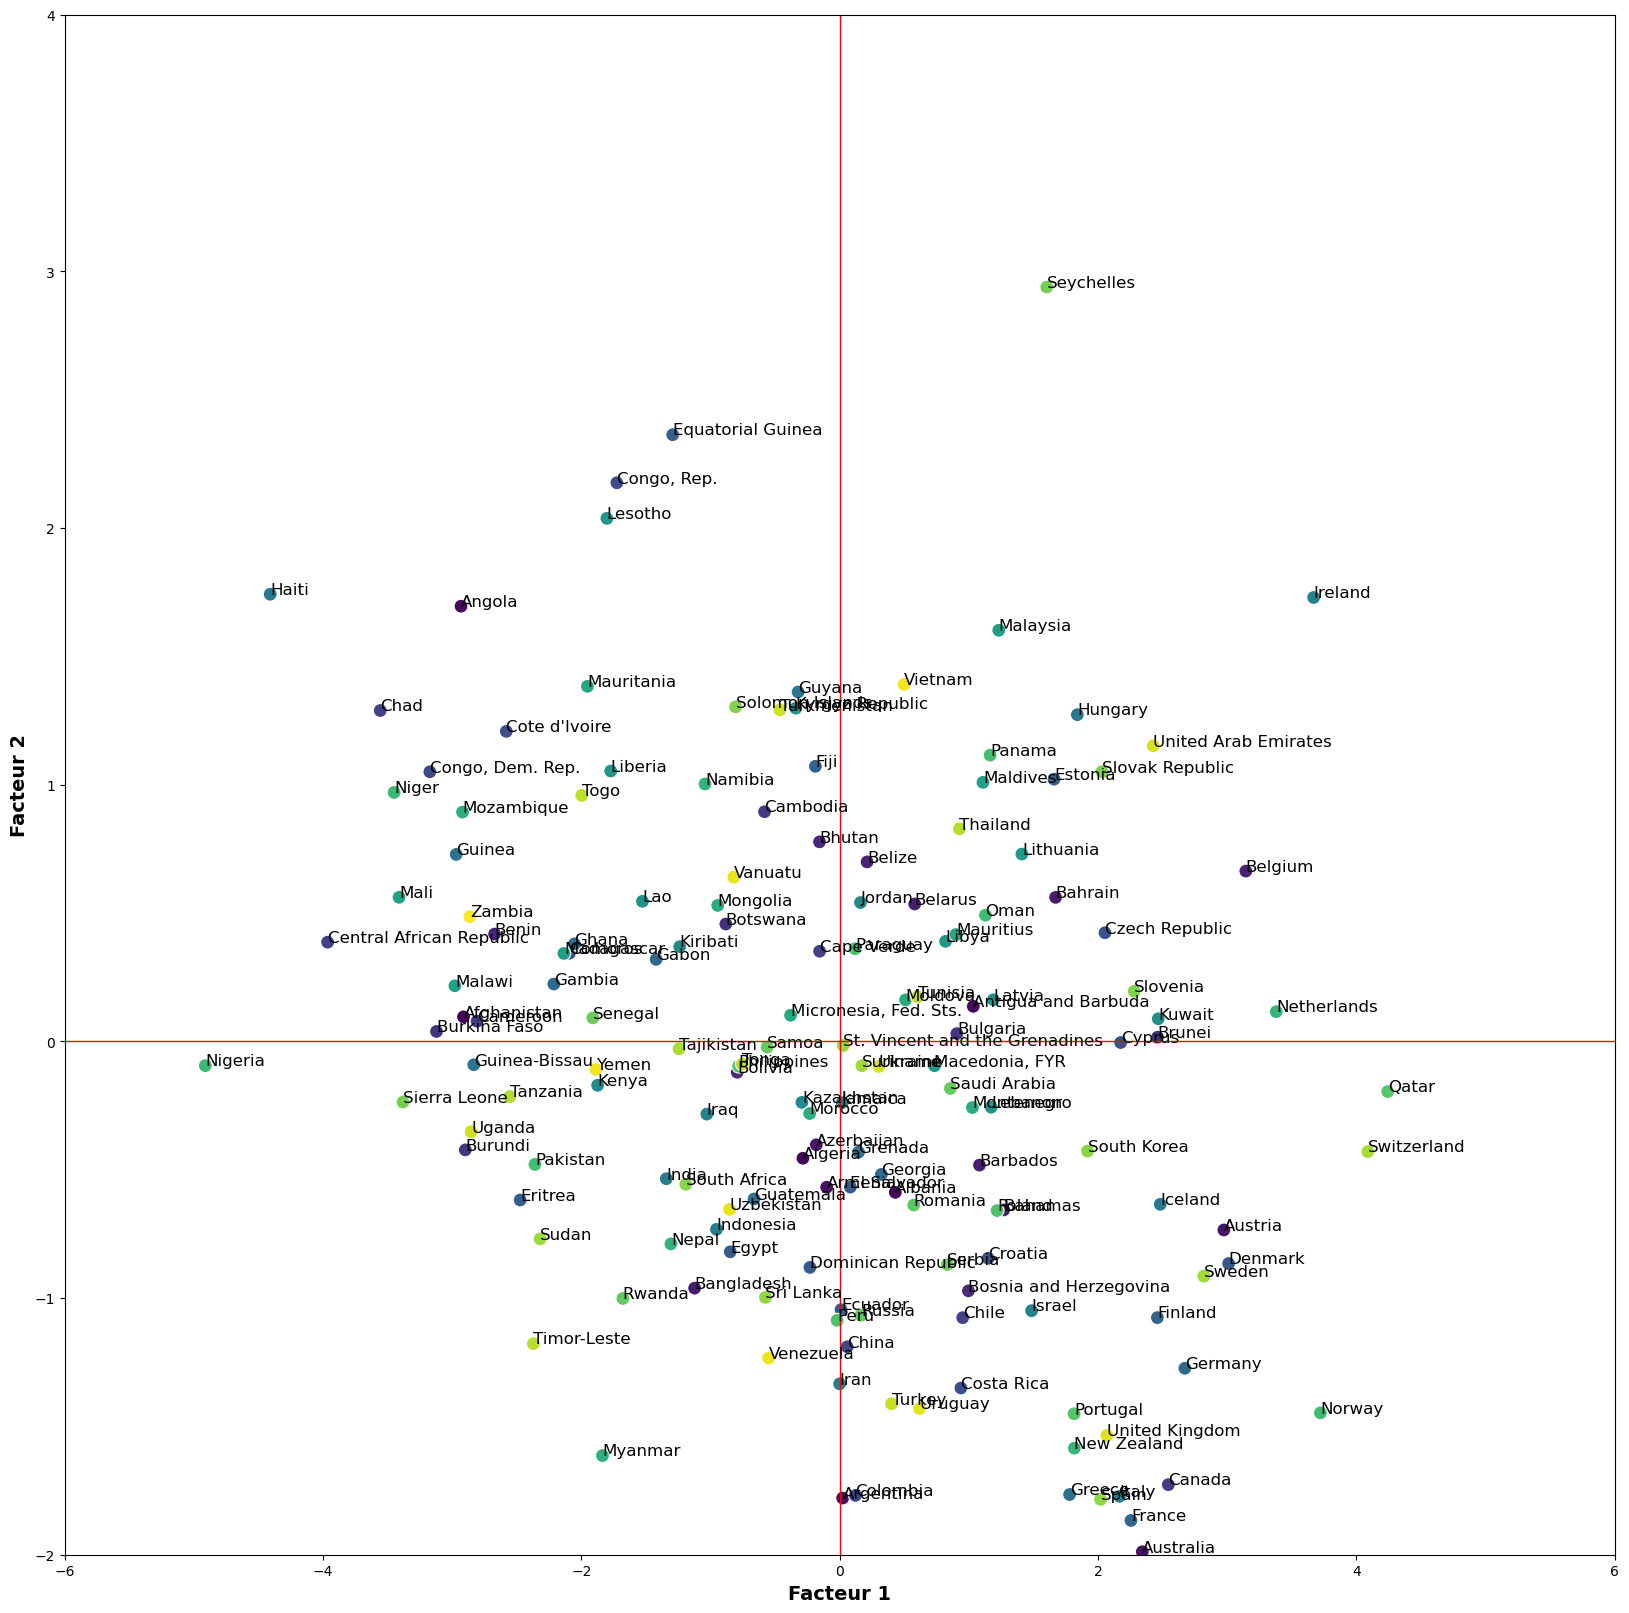

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
limite = 6
axes.set_xlim(-limite,limite)
axes.set_ylim(-limite+4,limite-2)
for i in range(country_data.shape[0]):
    plt.annotate(countries[i],(pca_data[i,0],pca_data[i,1]), fontsize=12)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=countries, palette='viridis', s=100, legend=False, ax=axes)
plt.plot([-limite,limite],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-limite,limite],color='red',linestyle='-',linewidth=1)
plt.xlabel("Facteur 1", fontsize=14,fontweight='bold')
plt.ylabel("Facteur 2", fontsize=14,fontweight='bold')
plt.show()

# Với bộ dữ liệu MNIST

In [ ]:
df = pd.read_csv('data/mnist_train.csv')
labels = df['label']
pixels = df.drop('label', axis=1)

pixels_scalerd = scaler.fit_transform(pixels)
pixels_scalerd.shape

(60000, 784)

In [ ]:
pixels_1000 = pixels_scalerd[:1000]
labels_1000 = labels[:1000]

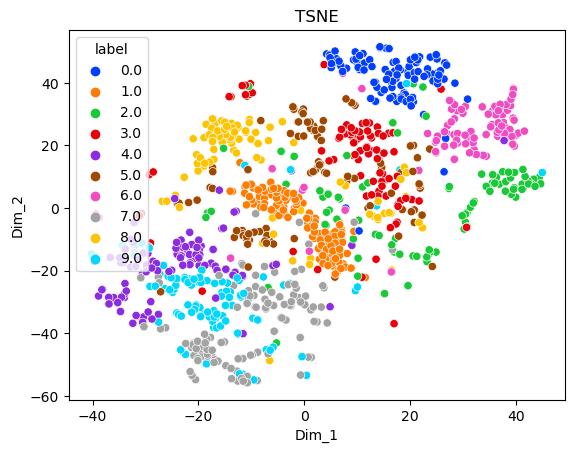

In [ ]:
# TSNE
tsne = TSNE(n_components=2, random_state=0)
pixels_tsne = tsne.fit_transform(pixels_1000)
pixels_tsne = np.vstack((pixels_tsne.T, labels_1000)).T
pixels_tsne = pd.DataFrame(data = pixels_tsne,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.title('TSNE')
plt.show()

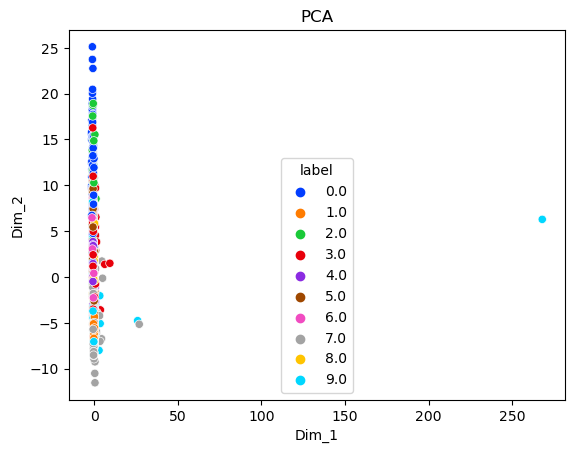

In [ ]:
# PCA
pca = PCA(n_components=2)
pixels_pca = pca.fit_transform(pixels_1000)
pixels_pca = np.vstack((pixels_pca.T, labels_1000)).T
pixels_pca = pd.DataFrame(data = pixels_pca,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=pixels_pca, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.title('PCA')
plt.show()